In [1]:
# Homework_1 / Sept. 2020  / Kangyan Xu

import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wdbc.data', header = None)
# number = data.shape[0] # number of patients
# print(number)
output = data.iloc[:,1] # 0-benign or 1-malignant
feature_raw = data.iloc[:,2:32] # Each has 30 features

In [3]:
# l2 Normalize
mean = np.mean(feature_raw) # mean vector
feature_substracted = feature_raw-mean

feature = normalize(feature_substracted, axis = 1, norm = 'l2')

In [4]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

In [5]:
partition = 100 # perform 100 random partitions
T = 500 # run gradient descent 500 iterations
step_size = 0.01
lamda = 0.01
error = np.zeros(partition)

# weight_without_bias
indicator = np.ones([31, 1])
indicator[30] = 0

for i in range(partition):
    
    weight = np.ones([30+1, 1]) # this weight contains bias b as last item
    
    # partition: 500 train data & 69 test data
    X_train, X_test, y_train, y_test = train_test_split(feature, output, test_size = 69, random_state = i)
    # Series to DataFrame
    y_train = y_train.to_frame().values
    
    # Add a column with all 1's / X_train 500,31
    X_train = np.column_stack((X_train, np.ones([500, 1])))

    # run gradient descent
    for j in range(T):
        
        temp = sigmoid(np.dot(X_train, weight)) - y_train # 1/XW - y / temp 500,1
        gradient = np.dot(X_train.T, temp) + lamda * (indicator * weight) # !! Don't put L2-regularization out
        weight = weight - step_size * gradient
    
    # prediction on test data
    X_test = np.column_stack((X_test, np.ones([69, 1])))
    y_test = y_test.to_frame().values
    
    prediction = np.round(sigmoid(np.dot(X_test, weight)))
    
    error[i] = int(69-sum(y_test == prediction))

print(error)
average_err = np.sum(error)/100
print("The average error over the 100 trials is %.2f" %average_err)


[ 3.  4.  6.  5.  8.  4.  1.  7.  5.  7.  6.  1.  8. 10.  6.  7.  8.  2.
  6.  3.  3.  6.  4.  2.  4.  6.  4.  5.  7.  8.  5.  5.  7.  7.  4.  2.
  5.  6.  2.  3.  4.  4.  2.  4.  4.  4.  4.  8.  3.  6.  3.  6.  1.  5.
  1.  4.  3.  6.  4.  6.  1.  5.  5.  4.  4.  2.  7.  5.  5.  5.  3.  2.
  8.  6.  2.  1.  4.  6.  8.  3.  3.  7.  4.  4.  4.  3.  7.  6.  6.  9.
  6.  3.  3.  4.  4.  7.  5.  4.  5.  3.]
The average error over the 100 trials is 4.67


In [6]:
### Calculate iterations needed for 10e-6 accuracy

partition = 100 # perform 100 random partitions
step_size = 0.01
lamda = 0.01
iterations = np.zeros(partition)

# weight_without_bias
indicator = np.ones([31, 1])
indicator[30] = 0

for i in range(partition):
    
    weight = np.ones([30+1, 1]) # this weight contains bias b as last item
    
    # partition: 500 train data & 69 test data
    X_train, X_test, y_train, y_test = train_test_split(feature, output, test_size = 69, random_state = i)
    # Series to DataFrame
    y_train = y_train.to_frame().values
    
    # Add a column with all 1's / X_train 500,31
    X_train = np.column_stack((X_train, np.ones([500, 1])))

    # run gradient descent
    while True:
        
        iterations[i] += 1

        temp = sigmoid(np.dot(X_train, weight)) - y_train # sigmoid(XW) - y / temp 500,1
        gradient = np.dot(X_train.T, temp) + lamda * (indicator * weight)
        weight = weight - step_size * gradient
        
        temp_new = sigmoid(np.dot(X_train, weight)) - y_train
        gradient_new = np.dot(X_train.T, temp_new) + lamda * (indicator * weight)
        
        # accuracy
        gradient_norm_sqr = np.square(np.linalg.norm(gradient_new, axis = 0))
        weight_without_bias_norm_sqr = np.square(np.linalg.norm(indicator * weight, axis = 0))
        Xw = np.dot(X_train, weight)
        function_value = - np.dot(y_train.T, Xw) + np.sum(np.logaddexp(Xw, np.e)) + lamda / 2 * weight_without_bias_norm_sqr
    
        accuracy = gradient_norm_sqr / (1 + np.abs(function_value))
        if accuracy <= 1e-6:
            break
    
print(iterations)
print(accuracy)
average_iter = np.sum(iterations)/100
print("The average iterations over the 100 trials is %d" %average_iter)


[11473. 11266. 11520. 11381. 12234. 11318. 11810. 11257. 11367. 10992.
 11619. 10871. 12052. 10784. 11919. 12872. 10792. 11139. 11212. 11616.
 11816. 12342. 11694. 11032. 11276. 11922. 12539. 11193. 12152. 12016.
 11836. 11873. 12361. 11567. 11355. 11085. 12118. 11387. 11188. 11124.
 11425. 11444. 11383. 11226. 11447. 11377. 11065. 11363. 13403. 12728.
 11449. 11382. 11205. 10875. 12683. 11037. 11550. 11139. 12220. 11142.
 11759. 11216. 11546. 11072. 11380. 11675. 11258. 11758. 11561. 11801.
 11811. 10765. 12705. 11937. 11387. 11303. 11347. 11155. 10905. 11087.
 11071. 11385. 11154. 10915. 11086. 12417. 11785. 12349. 12167. 11336.
 10893. 11202. 11602. 11169. 10884. 11728. 11524. 11576. 10811. 11360.]
[[9.99985152e-07]]
The average iterations over the 100 trials is 11527


In [7]:
### Calculate iterations needed for 10e-6 accuracy with momentum term - heavy ball method

partition = 100 # perform 100 random partitions
step_size = 0.01
lamda = 0.01
eta = 0.96 # 0.85~1
iterations = np.zeros(partition)

# weight_without_bias
indicator = np.ones([31, 1])
indicator[30] = 0

for i in range(partition):
    
    weight = np.ones([30+1, 1]) # this weight contains bias b as last item
    weight_last = np.zeros([31, 1])
    weight_new = np.zeros([31, 1])
    
    # partition: 500 train data & 69 test data
    X_train, X_test, y_train, y_test = train_test_split(feature, output, test_size = 69, random_state = i)
    # Series to DataFrame
    y_train = y_train.to_frame().values
    
    # Add a column with all 1's / X_train 500,31
    X_train = np.column_stack((X_train, np.ones([500, 1])))

    # run gradient descent (heavy ball)
    while True:
        
        iterations[i] += 1

        temp = sigmoid(np.dot(X_train, weight)) - y_train # sigmoid(XW) - y / temp 500,1
        gradient = np.dot(X_train.T, temp) + lamda * (indicator * weight)
        weight_new = weight - step_size * gradient + eta * (weight - weight_last)
        weight_last = weight
        weight = weight_new
        
        temp_new = sigmoid(np.dot(X_train, weight)) - y_train
        gradient_new = np.dot(X_train.T, temp_new) + lamda * (indicator * weight)
        
        # accuracy
        gradient_norm_sqr = np.square(np.linalg.norm(gradient_new, axis = 0))
        weight_without_bias_norm_sqr = np.square(np.linalg.norm(indicator * weight, axis = 0))
        Xw = np.dot(X_train, weight)
        function_value = - np.dot(y_train.T, Xw) + np.sum(np.logaddexp(Xw, np.e)) + lamda / 2 * weight_without_bias_norm_sqr
    
        accuracy = gradient_norm_sqr / (1 + np.abs(function_value))
        if accuracy <= 1e-6:
            break
    
print(iterations)
print(accuracy)
average_iter = np.sum(iterations)/100
print("Heavy ball: The average iterations over the 100 trials is %d" %average_iter)


[1401. 1402. 1405. 1409. 1412. 1403. 1397. 1403. 1400. 1402. 1405. 1405.
 1404. 1408. 1401. 1405. 1405. 1406. 1402. 1402. 1403. 1406. 1402. 1404.
 1403. 1407. 1406. 1401. 1406. 1408. 1405. 1403. 1405. 1408. 1403. 1400.
 1405. 1404. 1404. 1402. 1403. 1404. 1402. 1402. 1406. 1407. 1402. 1403.
 1403. 1401. 1406. 1405. 1402. 1404. 1405. 1401. 1404. 1404. 1401. 1398.
 1402. 1405. 1403. 1400. 1404. 1398. 1403. 1405. 1403. 1399. 1402. 1401.
 1405. 1406. 1403. 1404. 1402. 1402. 1406. 1402. 1403. 1405. 1403. 1400.
 1402. 1403. 1404. 1406. 1406. 1401. 1407. 1401. 1404. 1400. 1402. 1406.
 1400. 1402. 1403. 1404.]
[[9.96141206e-07]]
Heavy ball: The average iterations over the 100 trials is 1403


In [8]:
### Calculate iterations needed for 10e-6 accuracy with momentum term - Nesterov

partition = 100 # perform 100 random partitions
step_size = 0.01
lamda = 0.01
eta = 0.96 # 0.85~1
iterations = np.zeros(partition)

# weight_without_bias
indicator = np.ones([31, 1])
indicator[30] = 0

for i in range(partition):
    
    weight = np.ones([30+1, 1]) # this weight contains bias b as last item
    weight_last = np.zeros([31, 1])
    weight_new = np.zeros([31, 1])
    
    # partition: 500 train data & 69 test data
    X_train, X_test, y_train, y_test = train_test_split(feature, output, test_size = 69, random_state = i)
    # Series to DataFrame
    y_train = y_train.to_frame().values
    
    # Add a column with all 1's / X_train 500,31
    X_train = np.column_stack((X_train, np.ones([500, 1])))

    # run gradient descent (heavy ball)
    while True:
        
        iterations[i] += 1

        temp_Nesterov = sigmoid(np.dot(X_train, weight + eta * (weight - weight_last))) - y_train # sigmoid(XW) - y / temp 500,1
        gradient_Nesterov = np.dot(X_train.T, temp_Nesterov) + lamda * (indicator * (weight + eta * (weight - weight_last)))
        weight_new = weight - step_size * gradient_Nesterov + eta * (weight - weight_last)
        weight_last = weight
        weight = weight_new
                                                                        
        temp_new = sigmoid(np.dot(X_train, weight)) - y_train
        gradient_new = np.dot(X_train.T, temp_new) + lamda * (indicator * weight)
                                                                        
        # accuracy
        gradient_norm_sqr = np.square(np.linalg.norm(gradient_new, axis = 0))
        weight_without_bias_norm_sqr = np.square(np.linalg.norm(indicator * weight, axis = 0))
        Xw = np.dot(X_train, weight)
        function_value = - np.dot(y_train.T, Xw) + np.sum(np.logaddexp(Xw, np.e)) + lamda / 2 * weight_without_bias_norm_sqr
    
        accuracy = gradient_norm_sqr / (1 + np.abs(function_value))
        if accuracy <= 1e-6:
            break
    
print(iterations)
print(accuracy)
average_iter = np.sum(iterations)/100
print("Nesterov: The average iterations over the 100 trials is %d" %average_iter)


[1404. 1404. 1408. 1411. 1414. 1405. 1400. 1406. 1402. 1405. 1407. 1407.
 1406. 1411. 1404. 1408. 1408. 1408. 1405. 1404. 1405. 1408. 1405. 1407.
 1406. 1410. 1408. 1404. 1408. 1410. 1408. 1406. 1408. 1410. 1405. 1403.
 1407. 1407. 1406. 1405. 1406. 1407. 1405. 1405. 1409. 1410. 1404. 1406.
 1405. 1403. 1408. 1408. 1405. 1407. 1408. 1403. 1407. 1406. 1404. 1401.
 1405. 1407. 1406. 1403. 1406. 1401. 1406. 1408. 1405. 1402. 1404. 1404.
 1407. 1408. 1406. 1407. 1405. 1405. 1408. 1405. 1406. 1408. 1406. 1403.
 1405. 1406. 1407. 1408. 1409. 1404. 1409. 1404. 1407. 1403. 1405. 1408.
 1403. 1404. 1406. 1406.]
[[9.99822097e-07]]
Nesterov: The average iterations over the 100 trials is 1406


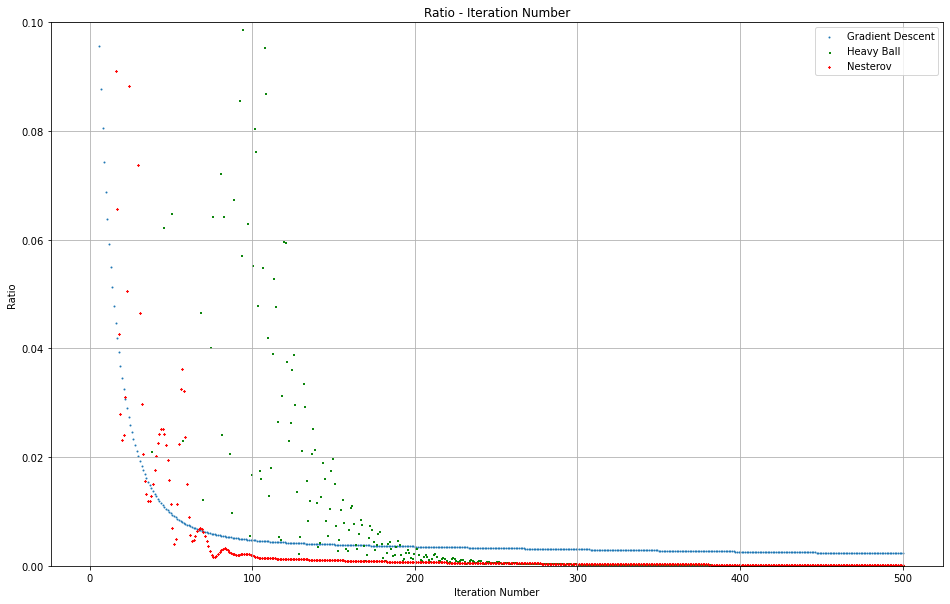

In [10]:
# Ratio Comparison (one trial)

%matplotlib inline 
import matplotlib.pyplot as plt

T = 500
step_size = 0.01
lamda = 0.01
eta = 0.96 # 0.85~1

# weight_without_bias
indicator = np.ones([31, 1])
indicator[30] = 0

accuracy_gradient_descent = np.zeros(500)
accuracy_heavy_ball = np.zeros(500)
accuracy_Nesterov = np.zeros(500)

weight = np.ones([30+1, 1]) # this weight contains bias b as last item
weight_H = np.ones([30+1, 1])
weight_last_H = np.zeros([31, 1])
weight_new_H = np.zeros([31, 1])
weight_N = np.ones([30+1, 1])
weight_last_N = np.zeros([31, 1])
weight_new_N = np.zeros([31, 1])
    
# partition: 500 train data & 69 test data
X_train, X_test, y_train, y_test = train_test_split(feature, output, test_size = 69, random_state = 37)
# Series to DataFrame
y_train = y_train.to_frame().values
    
# Add a column with all 1's / X_train 500,31
X_train = np.column_stack((X_train, np.ones([500, 1])))

# run gradient descent
for i in range(T):

    # ---------------------------------------- Gradient Descent ---------------------------------------- #
    
    temp = sigmoid(np.dot(X_train, weight)) - y_train # sigmoid(XW) - y / temp 500,1
    gradient = np.dot(X_train.T, temp) + lamda * (indicator * weight)
    weight = weight - step_size * gradient
        
    temp_new = sigmoid(np.dot(X_train, weight)) - y_train
    gradient_new = np.dot(X_train.T, temp_new) + lamda * (indicator * weight)
        
    # accuracy
    gradient_norm_sqr = np.square(np.linalg.norm(gradient_new, axis = 0))
    weight_without_bias_norm_sqr = np.square(np.linalg.norm(indicator * weight, axis = 0))
    Xw = np.dot(X_train, weight)
    function_value = - np.dot(y_train.T, Xw) + np.sum(np.logaddexp(Xw, np.e)) + lamda / 2 * weight_without_bias_norm_sqr
    
    accuracy_gradient_descent[i] = gradient_norm_sqr / (1 + np.abs(function_value))

    # ------------------------------------------- Heavy ball ------------------------------------------ #
    
    temp_H = sigmoid(np.dot(X_train, weight_H)) - y_train # sigmoid(XW) - y / temp 500,1
    gradient_H = np.dot(X_train.T, temp_H) + lamda * (indicator * weight_H)
    weight_new_H = weight_H - step_size * gradient_H + eta * (weight_H - weight_last_H)
    weight_last_H = weight_H
    weight_H = weight_new_H
        
    temp_new_H = sigmoid(np.dot(X_train, weight_H)) - y_train
    gradient_new_H = np.dot(X_train.T, temp_new_H) + lamda * (indicator * weight_H)
        
    # accuracy
    gradient_norm_sqr_H = np.square(np.linalg.norm(gradient_new_H, axis = 0))
    weight_without_bias_norm_sqr_H = np.square(np.linalg.norm(indicator * weight_H, axis = 0))
    Xw_H = np.dot(X_train, weight_H)
    function_value_H = - np.dot(y_train.T, Xw_H) + np.sum(np.logaddexp(Xw_H, np.e)) + lamda / 2 * weight_without_bias_norm_sqr_H
    
    accuracy_heavy_ball[i] = gradient_norm_sqr_H / (1 + np.abs(function_value_H))
    
    # ------------------------------------------- Nesterov ------------------------------------------ #
    
    temp_Nesterov = sigmoid(np.dot(X_train, weight_N + eta * (weight_N - weight_last_N))) - y_train # sigmoid(XW) - y / temp 500,1
    gradient_Nesterov = np.dot(X_train.T, temp_Nesterov) + lamda * (indicator * (weight_N + eta * (weight_N - weight_last_N)))
    weight_new_N = weight_N - step_size * gradient_Nesterov + eta * (weight_N - weight_last_N)
    weight_last_N = weight_N
    weight_N = weight_new_N
                                                                        
    temp_new_N = sigmoid(np.dot(X_train, weight_N)) - y_train
    gradient_new_N = np.dot(X_train.T, temp_new_N) + lamda * (indicator * weight_N)
                                                                        
    # accuracy
    gradient_norm_sqr_N = np.square(np.linalg.norm(gradient_new_N, axis = 0))
    weight_without_bias_norm_sqr_N = np.square(np.linalg.norm(indicator * weight_N, axis = 0))
    Xw_N = np.dot(X_train, weight_N)
    function_value_N = - np.dot(y_train.T, Xw_N) + np.sum(np.logaddexp(Xw_N, np.e)) + lamda / 2 * weight_without_bias_norm_sqr_N
    
    accuracy_Nesterov[i] = gradient_norm_sqr_N / (1 + np.abs(function_value_N)) 

# fig
axis_x = np.linspace(1, 500, 500)
plt.figure(figsize = (16, 10))
plt.scatter(axis_x, accuracy_gradient_descent, s = 4, marker = '.',)
plt.scatter(axis_x, accuracy_heavy_ball, s = 1, color = 'g', marker = 's',)
plt.scatter(axis_x, accuracy_Nesterov, s = 2, color = 'r', marker = 'x',)
plt.ylim(0, 0.1)

plt.legend(['Gradient Descent', 'Heavy Ball', 'Nesterov'])
plt.title('Ratio - Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Ratio')
plt.grid(True)
plt.savefig('Ratio - Iteration Number.png')
plt.show()